# Final plots for disserattion

### May 4, 2021

## Code

In [1]:
import sys
import csv
# sys.path.insert(0,"/users/PCON0003/cond0068/.local/lib/python3.7/")
sys.path.append("/users/PAS0654/osu8354/ARA_cvmfs/root_build/lib/") # go to parent dir
sys.path.append("/users/PCON0003/cond0068/.local/lib/python3.7/site-packages/")
# sys.path.append("/users/PCON0003/cond0068/pyrex_sims/fromBen/thesis_work/pyrex-custom/analysis/custom/analysis/")
import ROOT
import math
import numpy as np
from ROOT import TH1D,TF1, gRandom, gPad, gStyle
import matplotlib as mpl
import matplotlib.pyplot as plt
from ROOT import TChain, TSelector, TTree
import os
import matplotlib.colors as mcolors
import scipy
from matplotlib.colors import LogNorm
import pandas as pd
import seaborn as sns
%matplotlib inline
# sys.path.insert(1, "/users/PAS0654/osu8354/ARA_cvmfs/source/AraRoot/analysis/ARA_analysis/SourceSearch")
# import deDisperse_util as util
import matplotlib.colors as colors

my_path_plots = os.path.abspath("./plots/")
import re


Welcome to JupyROOT 6.18/04


In [2]:
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.unicode'] = True
mpl.rcParams['mathtext.rm'] = 'Times New Roman'
mpl.rcParams['mathtext.it'] = 'Times New Roman:italic'
mpl.rcParams['mathtext.bf'] = 'Times New Roman:bold'

mpl.rc('font', family='serif', size=12)
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['ytick.major.size'] = 5

mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['axes.labelsize'] = 18
# mpl.rc('font', size=16)
mpl.rc('axes', titlesize=20)

current_palette = sns.color_palette('colorblind', 10)
import warnings
warnings.filterwarnings("ignore")

###Bigger
# mpl.rcParams['text.usetex'] = True
# mpl.rcParams['text.latex.unicode'] = True
# mpl.rcParams['mathtext.rm'] = 'Times New Roman'
# mpl.rcParams['mathtext.it'] = 'Times New Roman:italic'
# mpl.rcParams['mathtext.bf'] = 'Times New Roman:bold'

# mpl.rc('font', family='serif', size=12)
# mpl.rcParams['xtick.labelsize'] = 18
# mpl.rcParams['ytick.labelsize'] = 18
# mpl.rcParams['xtick.major.size'] = 8
# mpl.rcParams['ytick.major.size'] = 8

# mpl.rcParams['axes.titlesize'] = 22
# mpl.rcParams['axes.labelsize'] = 22
# # mpl.rc('font', size=16)
# mpl.rc('axes', titlesize=20)

# current_palette = sns.color_palette('colorblind', 10)
# import warnings
# warnings.filterwarnings("ignore")




In [3]:
folder = "/users/PAS0654/osu8354/ARA_cvmfs/source/AraRoot/analysis/ARA_analysis/ARA_SourceSearch/results/"
f = ROOT.TFile.Open(folder + "storeValues_A2_c1.root","READ")

In [4]:
f.Get("OutputTreeV")

VTree = f.Get("OutputTreeV")
HTree = f.Get("OutputTreeH")

In [5]:
HTree.Print()

******************************************************************************
*Tree    :OutputTreeH: OutputTreeH                                            *
*Entries :    22451 : Total =          542260 bytes  File  Size =     331834 *
*        :          : Tree compression factor =   1.63                       *
******************************************************************************
*Br    0 :corr_val_outH : corr_val_outH/D                                    *
*Entries :    22451 : Total  Size=     180655 bytes  File Size  =     163902 *
*Baskets :        6 : Basket Size=      32000 bytes  Compression=   1.10     *
*............................................................................*
*Br    1 :snr_val_outH : snr_val_outH/D                                      *
*Entries :    22451 : Total  Size=     180645 bytes  File Size  =     165522 *
*Baskets :        6 : Basket Size=      32000 bytes  Compression=   1.09     *
*..................................................

In [6]:
print(HTree.GetEntries())

22451


# Data

In [7]:
corrVal_V = []
snr_V = []
numEntries = VTree.GetEntries()
for event in range(numEntries):
    VTree.GetEntry(event)
    corrVal_V.append(VTree.corr_val_outV)
    snr_V.append(VTree.snr_val_outV)

###Hpol
corrVal_H = []
snr_H = []
numEntries = HTree.GetEntries()
for event in range(numEntries):
    HTree.GetEntry(event)
    corrVal_H.append(HTree.corr_val_outH)
    snr_H.append(HTree.snr_val_outH)

In [8]:
f.Close()

## Bivariate distribution

In [9]:
from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)

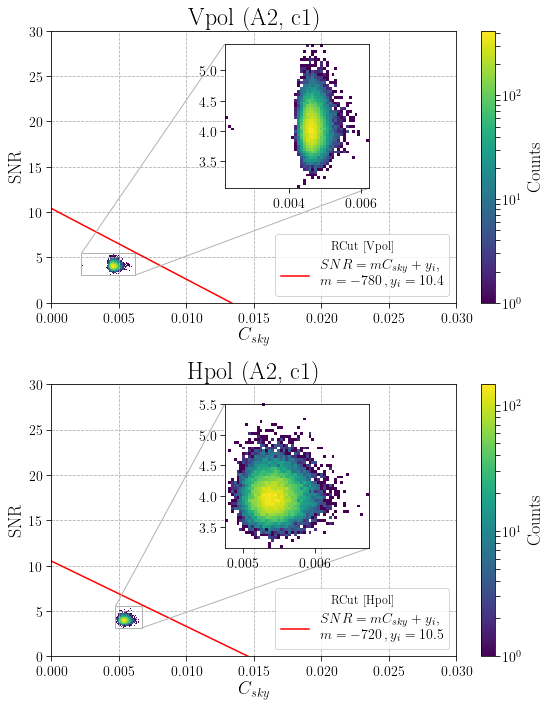

In [10]:
# plt.figure(figsize=(8,5))
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))
axs = axes.ravel()

m = -780
x = np.linspace(0,0.03)
y_i = 10.4
y = m*x + y_i

ax0 = axes[0].hist2d(corrVal_V, snr_V, bins = 50, norm = mpl.colors.LogNorm());
fig.colorbar(ax0[3], ax = axs[0], label = "Counts")
axes[0].plot(x,y, c = "red", label="$SNR=mC_{sky}+y_i$,\n $m=%0.0f\,,y_i=%0.1f$"%(m,y_i))
axes[0].set_xlim(0,0.03)
axes[0].set_ylim(0,30)
axes[0].grid(ls="--")
axes[0].set_xlabel("$C_{sky}$")
axes[0].set_ylabel("SNR")
axes[0].set_title("Vpol (A2, c1)", fontsize = 24)
axes[0].legend(loc = "lower right", fontsize = 14, title="RCut [Vpol]", fancybox=True)

left, bottom, width, height = [0.4, 0.73, 0.25, 0.2]
ins1 = fig.add_axes([left, bottom, width, height])
ip = InsetPosition(axes[0], [left, bottom, width, height])
ins1.hist2d(corrVal_V, snr_V, bins = 50, norm = mpl.colors.LogNorm());
mark_inset(axes[0], ins1, loc1=2, loc2=4, fc="none", ec='0.7')
#####HPOL########
m = -720
x = np.linspace(0,0.03)
y_i = 10.5
y = m*x + y_i

ax1 = axes[1].hist2d(corrVal_H, snr_H, bins = 50, norm = mpl.colors.LogNorm());
fig.colorbar(ax1[3], ax = axs[1], label = "Counts")
axes[1].plot(x,y, c = "red", label="$SNR=mC_{sky}+y_i$,\n $m=%0.0f\,,y_i=%0.1f$"%(m,y_i))
axes[1].set_xlim(0,0.03)
axes[1].set_ylim(0,30)
axes[1].grid(ls="--")
axes[1].set_xlabel("$C_{sky}$")
axes[1].set_ylabel("SNR")
axes[1].set_title("Hpol (A2, c1)", fontsize = 24)
axes[1].legend(loc = "lower right", fontsize = 14, title="RCut [Hpol]", fancybox=True)

left, bottom, width, height = [0.4, 0.23, 0.25, 0.2]
ins2 = fig.add_axes([left, bottom, width, height])
ip2 = InsetPosition(axes[1], [left, bottom, width, height])
ins2.hist2d(corrVal_H, snr_H, bins = 50, norm = mpl.colors.LogNorm());
mark_inset(axes[1], ins2, loc1=2, loc2=4, fc="none", ec='0.7')
plt.tight_layout()
# plt.savefig("./A2_c1_biVariatePlaneDist_latestMay9.pdf")

# Simulation

In [16]:
folder = "/users/PAS0654/osu8354/ARA_cvmfs/source/AraRoot/analysis/ARA_analysis/ARA_SourceSearch/results/"

f = ROOT.TFile.Open(folder + "storeValues_A2_c1_sim.root","READ")

In [17]:
f.Get("OutputTreeV")

VTree = f.Get("OutputTreeV")
HTree = f.Get("OutputTreeH")

In [18]:
VTree.Print()

******************************************************************************
*Tree    :OutputTreeV: OutputTreeV                                            *
*Entries :    16823 : Total =          627939 bytes  File  Size =     484150 *
*        :          : Tree compression factor =   1.29                       *
******************************************************************************
*Br    0 :corr_val_outV : corr_val_outV/D                                    *
*Entries :    16823 : Total  Size=     135544 bytes  File Size  =     128238 *
*Baskets :        5 : Basket Size=      32000 bytes  Compression=   1.05     *
*............................................................................*
*Br    1 :snr_val_outV : snr_val_outV/D                                      *
*Entries :    16823 : Total  Size=     135535 bytes  File Size  =     126590 *
*Baskets :        5 : Basket Size=      32000 bytes  Compression=   1.07     *
*..................................................

In [22]:
corrVal_V_sim = []
snr_V_sim = []
weights_V_sim = []
energy_sim = []
pass0_sim = []
RecoTheta_sim = []
inBox_sim = []
numEntries = VTree.GetEntries()
for event in range(numEntries):
    VTree.GetEntry(event)
    corrVal_V_sim.append(VTree.corr_val_outV)
    snr_V_sim.append(VTree.snr_val_outV)
    weights_V_sim.append(VTree.weight)
    energy_sim.append(VTree.energy_out)
    pass0_sim.append(VTree.pass0)
    RecoTheta_sim.append(VTree.RecoTheta_outV)
# ###Hpol
# corrVal_H = []
# snr_H = []
# weights_H = []
# numEntries = HTree.GetEntries()
# for event in range(numEntries):
#     HTree.GetEntry(event)
#     corrVal_H.append(HTree.corr_val_outH)
#     snr_H.append(HTree.snr_val_outH)
#     weights_H.append(HTree.weight)

In [23]:
f.Close()

NameError: name 'weights_V' is not defined

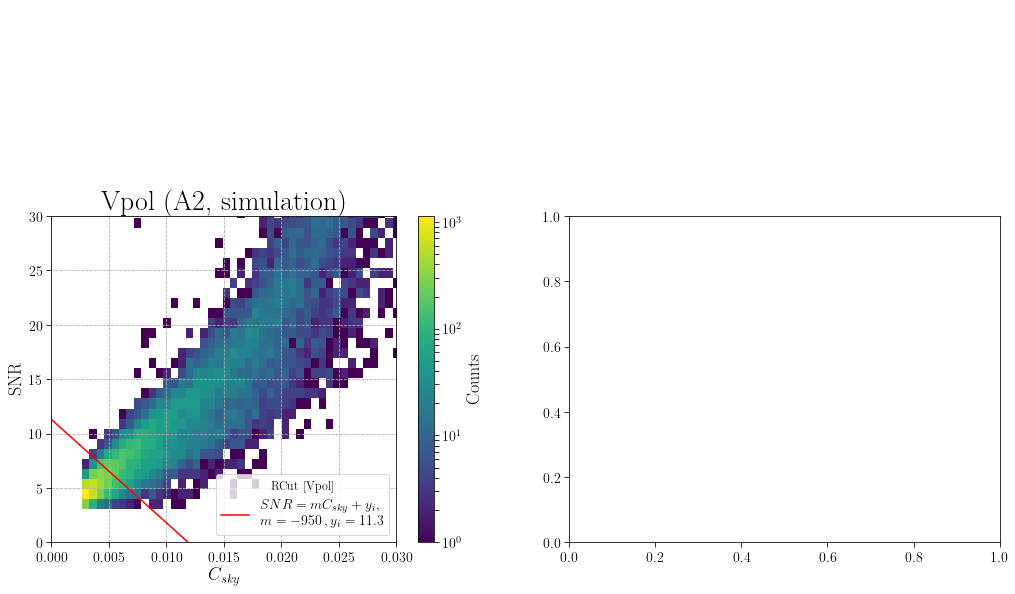

In [25]:
# plt.figure(figsize=(8,5))
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(17, 6))
axs = axes.ravel()

m = -950
x = np.linspace(0,0.03)
y_i = 11.3
y = m*x + y_i

ax0 = axes[0].hist2d(corrVal_V_sim, snr_V_sim, bins = 50, weights = weights_V_sim, norm = mpl.colors.LogNorm());
fig.colorbar(ax0[3], ax = axs[0], label = "Counts")
axes[0].plot(x,y, c = "red", label="$SNR=mC_{sky}+y_i$,\n $m=%0.0f\,,y_i=%0.1f$"%(m,y_i))
axes[0].set_xlim(0,0.03)
axes[0].set_ylim(0,30)
axes[0].grid(ls="--")
axes[0].set_xlabel("$C_{sky}$")
axes[0].set_ylabel("SNR")
axes[0].set_title("Vpol (A2, simulation)", fontsize = 28)
axes[0].legend(loc = "lower right", fontsize = 14, title="RCut [Vpol]", fancybox=True)

#####HPOL########
# m = -1320
# x = np.linspace(0,0.03)
# y_i = 14.3
# y = m*x + y_i

ax1 = axes[1].hist2d(corrVal_H, snr_H, bins = 50,weights = weights_V, norm = mpl.colors.LogNorm());
# fig.colorbar(ax1[3], ax = axs[1], label = "Counts")
# axes[1].plot(x,y, c = "red", label="$SNR=mC_{sky}+y_i$,\n $m=%0.0f\,,y_i=%0.1f$"%(m,y_i))
# axes[1].set_xlim(0,0.03)
# axes[1].set_ylim(0,30)
# axes[1].grid(ls="--")
# axes[1].set_xlabel("$C_{sky}$")
# axes[1].set_ylabel("SNR")
# axes[1].set_title("Hpol (A2, simulation)", fontsize = 28)
# axes[1].legend(loc = "lower right", fontsize = 14, title="RCut [Hpol]", fancybox=True)

plt.tight_layout()
# plt.savefig("./A2_c1_biVariatePlaneDist_sim.pdf")

## Data and Sim plot

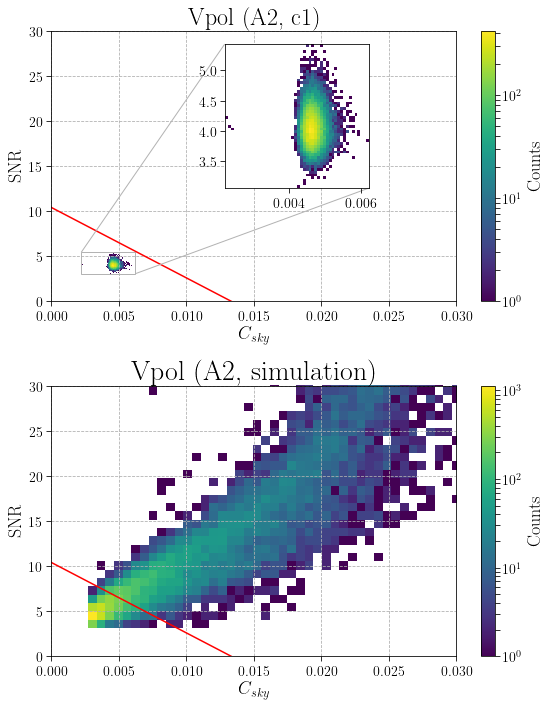

In [33]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))
axs = axes.ravel()

m = -780
x = np.linspace(0,0.03)
y_i = 10.4
y = m*x + y_i

ax0 = axes[0].hist2d(corrVal_V, snr_V, bins = 50, norm = mpl.colors.LogNorm());
fig.colorbar(ax0[3], ax = axs[0], label = "Counts")
axes[0].plot(x,y, c = "red", label="$SNR=mC_{sky}+y_i$,\n $m=%0.0f\,,y_i=%0.1f$"%(m,y_i))
axes[0].set_xlim(0,0.03)
axes[0].set_ylim(0,30)
axes[0].grid(ls="--")
axes[0].set_xlabel("$C_{sky}$")
axes[0].set_ylabel("SNR")
axes[0].set_title("Vpol (A2, c1)", fontsize = 24)
# axes[0].legend(loc = "lower right", fontsize = 14, title="RCut [Vpol]", fancybox=True)

left, bottom, width, height = [0.4, 0.73, 0.25, 0.2]
ins1 = fig.add_axes([left, bottom, width, height])
ip = InsetPosition(axes[0], [left, bottom, width, height])
ins1.hist2d(corrVal_V, snr_V, bins = 50, norm = mpl.colors.LogNorm());
mark_inset(axes[0], ins1, loc1=2, loc2=4, fc="none", ec='0.7')

ax1 = axes[1].hist2d(corrVal_V_sim, snr_V_sim, bins = 50, weights = weights_V_sim, norm = mpl.colors.LogNorm());
fig.colorbar(ax1[3], ax = axs[1], label = "Counts")
axes[1].plot(x,y, c = "red", label="$SNR=mC_{sky}+y_i$,\n $m=%0.0f\,,y_i=%0.1f$"%(m,y_i))
axes[1].set_xlim(0,0.03)
axes[1].set_ylim(0,30)
axes[1].grid(ls="--")
axes[1].set_xlabel("$C_{sky}$")
axes[1].set_ylabel("SNR")
axes[1].set_title("Vpol (A2, simulation)", fontsize = 28)
# axes[1].legend(loc = "lower right", fontsize = 14, title="RCut [Vpol]", fancybox=True)
plt.tight_layout()
plt.savefig("./A2_c1_biVariatePlaneDist_noCutForSlides.pdf")
